# Import Library

In [73]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import cv2
from skimage import io
import os
from IPython.display import clear_output
import time 
from itertools import islice
from pathlib import Path
from keras.preprocessing import image
plt.rcParams['figure.figsize'] = (20, 5)

# Custom Function

In [74]:
def chunk(it, size):
    it = iter(it)
    return iter(lambda: tuple(islice(it, size)),())

In [75]:
def Delete_Picture(selection,pic_path):
    for i in range(len(selection)):
        if selection[i]=='0':
            print(f'Delete Pic: {pic_path[i]}')
            os.remove(pic_path[i])
            amount_dict[int(pic_path[i][5])]-=1
            delete_dict[int(pic_path[i][5])]+=1
            

# Import Data

In [76]:
pic_array_list=[]
pic_path_list=[]
pic_amount_list=[]
for i in range(8):
    pic_amount=len(sorted(Path(f'data/{i+1}').glob('*.png')))
    pic_amount_list.append(pic_amount)
    print(f'In label {i+1}: ',pic_amount)

for i in range(8):
    for pic_path in sorted(Path(f'data/{i+1}').glob('*.png')):
        pic_path_list.append(str(pic_path))
        try:
            image_array=np.array(image.load_img(pic_path,target_size=(150,150)),dtype='uint8')
        except:
            image_array=np.zeros((150,150,3),dtype='uint8')
        pic_array_list.append(image_array)

In label 1:  221
In label 2:  233
In label 3:  172
In label 4:  158
In label 5:  244
In label 6:  220
In label 7:  242


In [77]:
chunk_num=10
pic_array_chunk_list=list(chunk(pic_array_list,chunk_num))
pic_path_chunk_list=list(chunk(pic_path_list,chunk_num))
chunk_list=list(zip(pic_array_chunk_list,pic_path_chunk_list))

In [78]:
amount_dict={i+1:j for i,j in enumerate(pic_amount_list)}
delete_dict={i+1:0 for i in range(pic_amount_list)}

# Select Data

Total Pic:

{1: 140, 2: 168, 3: 134, 4: 121, 5: 106, 6: 163, 7: 126}

Delete Pic:

{1: 81, 2: 65, 3: 38, 4: 37, 5: 138, 6: 57, 7: 116}


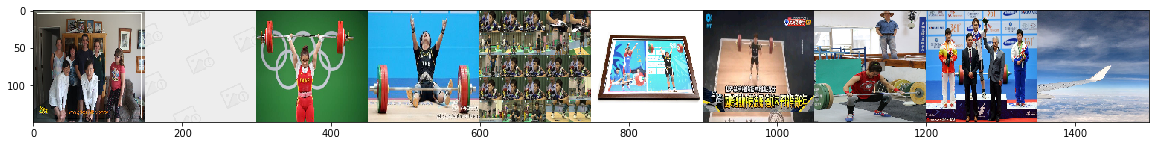

1 or 0(1:Useful,0:Useful): 0001000000
Delete Pic: data/7/7_0232.png
Delete Pic: data/7/7_0233.png
Delete Pic: data/7/7_0234.png
Delete Pic: data/7/7_0236.png
Delete Pic: data/7/7_0237.png
Delete Pic: data/7/7_0238.png
Delete Pic: data/7/7_0239.png
Delete Pic: data/7/7_0240.png
Delete Pic: data/7/7_0241.png


In [79]:
plt.rcParams['figure.figsize'] = (20, 5)
for chunk_set in chunk_list:
        pic_chunk=chunk_set[0]
        pic_path=chunk_set[1]
        print(f'Total Pic:\n\n{amount_dict}\n\nDelete Pic:\n\n{delete_dict}')
        try:
            combine_pic=np.concatenate(pic_chunk,axis=1)
        except:
            print([array.shape for array in pic_chunk])
            checker=pic_chunk
            break
        plt.imshow(combine_pic)
        plt.show()
        while True:
            selection=input("1 or 0(1:Useful,0:Useful): ")
            if len(selection)==chunk_num:
                Delete_Picture(selection,pic_path)
                time.sleep(0.1)
                break
        clear_output(wait=True)